In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

from os.path import join, exists 

import numpy as np
import matplotlib.pyplot as plt
from h5py import File
import scienceplots

import candel
from candel import plot_corner_from_hdf5, read_samples
from utils import * 


%matplotlib inline
%load_ext autoreload
%autoreload 2


COLS = ["#87193d", "#1e42b9", "#d42a29", "#05dd6b", "#ee35d5"]

config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
config = candel.load_config(config_path, )
root = join("/Users/rstiskalek/Projects/CANDEL/", "results", "dH0")

In [2]:
!ls /Users/rstiskalek/Projects/CANDEL/results/dH0/*CF4_W1*.hdf5

/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR_linear.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR_zeropoint_dipole.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/Vext_CF4_W1_MNR_zeropoint_dipole_linear.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial_lininterp.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_manticore_2MPP_MULTIBIN_N256_DES_V2_CF4_W1_MNR_double_powerlaw_eta_sampled_zeropoint_dipole_beta_1.0.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_bad_photo_too.hdf5
/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_

### Posterior summary

In [7]:
fname = join(root, "precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_linear.hdf5")
# fname = join(root, "precomputed_los_precomputed_los_Carrick2015_2MTF_MNR_zeropoint_dipole.hdf5")
# fname = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5"
# fname = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_bad_photo_too.hdf5"

with File(fname, "r") as f:
    grp = f["samples"]
    # print(f"keys: {list(grp.keys())}")

    # for key in grp.keys():
        # print(f"{key}: {np.median(grp[key][...])}")

    samples = {key: grp[key][...] for key in grp.keys()}


keys_read = ["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b", "dH0"]
# keys_read = ["sigma_int"]
# keys_read = ["zeropoint_dipole_mag", "dH0"]
# keys_read = ['M_dipole_b', 'M_dipole_ell', 'M_dipole_mag']
# keys_read = ['Vext_b', 'Vext_ell', 'Vext_mag']

# samples["dH0"] = 10**(samples["M_dipole_mag"] / 5) - 1

for key in keys_read:
    if key == "dH0":
        x = 10**(samples["zeropoint_dipole_mag"] / 5) - 1
    else:
        x = samples[key]

    low, med, high = np.percentile(x, [16, 50, 84])
    low = med - low
    high = high - med
    print(f"{key}: {med:.3f} +{high:.3f} -{low:.3f}")


logZ = compare_zeropoint_dipole_gof(fname, "logZ_harmonic")
print(f"logZ_harmonic: {logZ:.3f}")

zeropoint_dipole_mag: 0.088 +0.019 -0.019
zeropoint_dipole_ell: 125.726 +11.927 -11.114
zeropoint_dipole_b: 7.666 +8.585 -9.500
dH0: 0.041 +0.009 -0.009
[DIPOLE]:    -12430.380053960513
[ISO]:       -12433.685611765155
[INFO] File last modified: 2025-09-05 16:17:09
logZ_harmonic: 3.306


### Figure: Carrick+2015 MNR posterior with a dipole

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    ]

cols = [
    COLS[0],
    "k",
    ]

labels = [
    "With zero-point dipole",
    "Without zero-point dipole",
    ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    cols=cols,
    fontsize=30,
    legend_fontsize=38,
    filled=False,
    keys=None,
    filename="/Users/rstiskalek/Downloads/C15_full_posterior.pdf",
    )

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v
Removed no burn in
Removed no burn in


KeyboardInterrupt: 

In [4]:
import inspect
from getdist import plots
print(inspect.signature(plots.GetDistPlotter.triangle_plot))
help(plots.GetDistPlotter.triangle_plot)

(self, roots, params=None, legend_labels=None, plot_3d_with_param=None, filled=False, shaded=False, contour_args=None, contour_colors=None, contour_ls=None, contour_lws=None, line_args=None, label_order=None, legend_ncol=None, legend_loc=None, title_limit=None, upper_roots=None, upper_kwargs=mappingproxy({}), upper_label_right=False, diag1d_kwargs=mappingproxy({}), markers=None, marker_args=mappingproxy({}), param_limits=mappingproxy({}), **kwargs)
Help on function triangle_plot in module getdist.plots:

triangle_plot(self, roots, params=None, legend_labels=None, plot_3d_with_param=None, filled=False, shaded=False, contour_args=None, contour_colors=None, contour_ls=None, contour_lws=None, line_args=None, label_order=None, legend_ncol=None, legend_loc=None, title_limit=None, upper_roots=None, upper_kwargs=mappingproxy({}), upper_label_right=False, diag1d_kwargs=mappingproxy({}), markers=None, marker_args=mappingproxy({}), param_limits=mappingproxy({}), **kwargs)
    Make a trianglular a

### Figure: Zoom-in on the magnitude dipole

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-SFD.hdf5: R_dist_emp, R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-CSFD.hdf5: R_dist_emp, R_dust, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_st

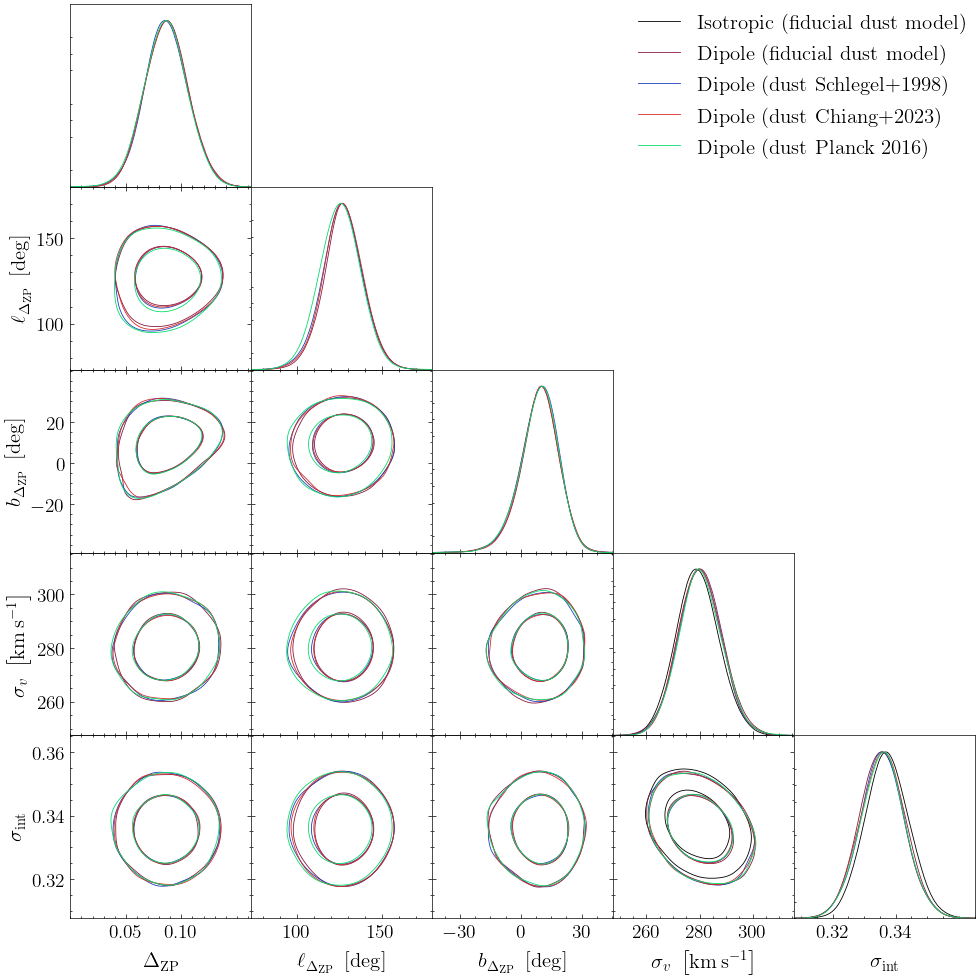

In [5]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-SFD.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-CSFD.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_dust-Planck2016.hdf5",
    ]

labels = [
    "Isotropic (fiducial dust model)",
    "Dipole (fiducial dust model)",
    "Dipole (dust Schlegel+1998)",
    "Dipole (dust Chiang+2023)",
    "Dipole (dust Planck 2016)",
    ]

cols = [
    "k",
    COLS[0],
    COLS[1],
    COLS[2],
    COLS[3],
]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

points = {("zeropoint_dipole_ell", "zeropoint_dipole_b"): (272 - 180, -28)}

plot_corner_from_hdf5(
    fnames,
    fontsize=18,
    filled=False,
    labels=labels,
    cols=cols,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b", "sigma_v", "sigma_int",],
    filename="/Users/rstiskalek/Downloads/C15_mag_dipole.pdf",
    # points=points,
    )

### Figure: Dipole prior dependence

In [11]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5",
    ]

labels = [
    "Uniform in magnitude",
    "Uniform in components",
    # "Dipole",
    # "Dipole + dust (Schlegel+1998)",
    # "Dipole + dust (Schlafly \& Finkbeiner 2011)",
    # "Dipole + dust (Planck)",
    ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    fontsize=20,
    filled=False,
    labels=labels,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b",],
    filename="/Users/rstiskalek/Downloads/dipole_prior_dependence.pdf",
    )

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_UnifComponents.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
Error in /Users/rstiskalek/Projects/CANDEL/venv_candel/lib/python3.12/site-packages/getdist/analysis_defaults.ini


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rstiskalek/Projects/CANDEL/venv_candel/lib/python3.12/site-packages/getdist/analysis_defaults.ini'

### Figure: Dipoles in CF4, 2MTF, SFI++, Pantheon+

precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5: R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, a_TFR, b_TFR, beta, c_TFR, eta_prior_mean, eta_prior_std, n_dist_emp, p_dist_emp, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_PantheonPlus_MNR_zeropoint_dipole.hdf5: M, R_dist_emp, Vext, Vext_b, Vext_ell, Vext_mag, beta, n_dist_emp, p_dist_emp, r_latent, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
precomputed_los_precomputed_los_Carrick2015_PantheonPlusLane_MNR_zeropoint_dipole.hdf5: M, R_dist_emp, SN_alpha, SN_beta, Vext, Vext_b, Vext_ell, Vext_mag, beta, n_dist_emp, p_dist_emp, r_latent, sigma_int, sigma_v, zeropoint_dipole_b, zeropoint_dipole_ell, zeropoint_dipole_mag
Removed no burn in
Removed no burn in
Removed no burn in
2025-09-15 14:55:38 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/C15_all_TFR.pdf


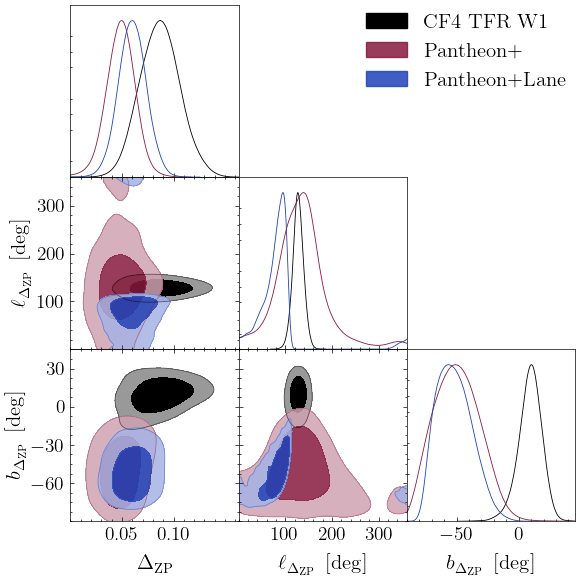

In [ ]:
fnames = [
    "precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_SFI_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_2MTF_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_PantheonPlus_MNR_zeropoint_dipole.hdf5",
    "precomputed_los_Carrick2015_PantheonPlusLane_MNR_zeropoint_dipole.hdf5",
    ]

labels = [
    "CF4 TFR W1",
    "SFI++",
    "2MTF",
    "Pantheon+",
    "Pantheon+Lane",
]

cols = ["k",
        COLS[0],
        COLS[1],
        COLS[2],
        COLS[3],
        ]

fnames = [join(root, "precomputed_los_" + f) for f in fnames]

plot_corner_from_hdf5(
    fnames,
    labels=labels,
    cols=cols,
    fontsize=18,
    keys=["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b",],
    filled=True,
    filename="/Users/rstiskalek/Downloads/C15_all_TFR.pdf",
    )

### Figure: Literature direction comparison

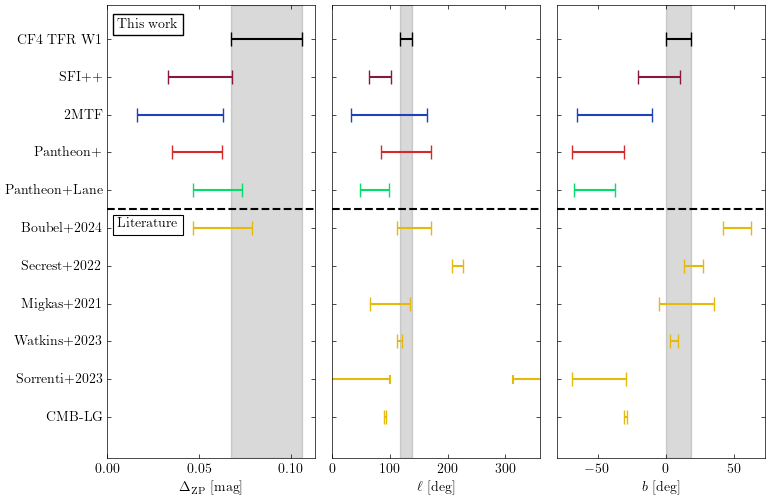

In [6]:

def circ_percentiles_deg(a, qs=(16, 50, 84)):
    """Circular percentiles on [0, 360) with NaN robustness."""
    a = np.asarray(a).ravel() % 360.0
    a = a[~np.isnan(a)]
    if a.size == 0:
        return np.array([np.nan, np.nan, np.nan])

    ang = np.deg2rad(a)
    c = np.nanmean(np.cos(ang))
    s = np.nanmean(np.sin(ang))
    mu = (np.rad2deg(np.arctan2(s, c)) + 360.0) % 360.0

    # unwrap around mean direction to [-180, 180)
    x = ((a - mu + 180.0) % 360.0) - 180.0
    p = np.nanpercentile(x, qs)
    return (mu + p) % 360.0


def _plot_linear_whisker(ax, med, lo, hi, y, color, lw):
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return
    ax.errorbar(
        med, y,
        xerr=[[med - lo], [hi - med]],
        fmt="none",
        ecolor=color,
        elinewidth=1.5 * lw,
        capsize=5,
        zorder=2,
    )


def _plot_circ_whisker(ax, med, lo, hi, y, color, lw, cap_frac=0.12):
    """Whisker on [0,360): draws proper caps when interval wraps."""
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return

    med = float(med % 360.0)
    lo = float(lo % 360.0)
    hi = float(hi % 360.0)

    # unwrap ends around median (shortest arc)
    lo_u = ((lo - med + 180.0) % 360.0) - 180.0
    hi_u = ((hi - med + 180.0) % 360.0) - 180.0
    if lo_u > hi_u:
        lo_u, hi_u = hi_u, lo_u
    lo_abs = (med + lo_u) % 360.0
    hi_abs = (med + hi_u) % 360.0

    lw_err = 1.5 * lw
    cap_h  = cap_frac  # vertical half-height of end-caps in y-data units

    if lo_abs <= hi_abs:
        # simple case: no wrap -> use errorbar (gets caps automatically)
        ax.errorbar(
            med, y,
            xerr=[[med - lo_abs], [hi_abs - med]],
            fmt="none",
            ecolor=color,
            elinewidth=lw_err,
            capsize=5,
            zorder=2,
        )
    else:
        # wrap case: draw two segments + explicit end-caps
        ax.hlines(y, 0.0,   hi_abs,  colors=color, linewidth=lw_err, zorder=2)
        ax.hlines(y, lo_abs, 360.0,  colors=color, linewidth=lw_err, zorder=2)

        # end-caps as short vertical ticks at the two ends
        ax.vlines(hi_abs, y - cap_h, y + cap_h, colors=color, linewidth=lw_err, zorder=3)
        ax.vlines(lo_abs, y - cap_h, y + cap_h, colors=color, linewidth=lw_err, zorder=3)


def _fill_circ_band(ax, med, lo, hi, color, alpha=0.15, zorder=-3):
    if np.isnan(med) or np.isnan(lo) or np.isnan(hi):
        return

    med = float(med % 360.0)
    lo = float(lo % 360.0)
    hi = float(hi % 360.0)

    lo_u = ((lo - med + 180.0) % 360.0) - 180.0
    hi_u = ((hi - med + 180.0) % 360.0) - 180.0
    if lo_u > hi_u:
        lo_u, hi_u = hi_u, lo_u
    lo_abs = (med + lo_u) % 360.0
    hi_abs = (med + hi_u) % 360.0

    if lo_abs <= hi_abs:
        ax.axvspan(lo_abs, hi_abs, color=color, alpha=alpha, zorder=zorder)
    else:
        ax.axvspan(0.0, hi_abs, color=color, alpha=alpha, zorder=zorder)
        ax.axvspan(lo_abs, 360.0, color=color, alpha=alpha, zorder=zorder)


def _pad(xlo, xhi, frac=0.08):
    d = xhi - xlo
    d = d if np.isfinite(d) and d > 0 else 1.0
    return xlo - frac * d, xhi + frac * d


# ===================== load samples =====================

keys = ["zeropoint_dipole_mag", "zeropoint_dipole_ell", "zeropoint_dipole_b"]
S = [read_samples(root, f, keys=keys) for f in fnames]

mag_samps = [np.asarray(s["zeropoint_dipole_mag"]).ravel() for s in S]
ell_samps = [np.asarray(s["zeropoint_dipole_ell"]).ravel() % 360.0 for s in S]
b_samps   = [np.asarray(s["zeropoint_dipole_b"]).ravel() for s in S]

# ===================== summarise =====================

mag_q = np.array([np.nanpercentile(s, [16, 50, 84]) for s in mag_samps])
b_q   = np.array([np.nanpercentile(s, [16, 50, 84]) for s in b_samps])
ell_q = np.array([circ_percentiles_deg(s) for s in ell_samps])

mag_med, mag_lo, mag_hi = mag_q[:, 1], mag_q[:, 0], mag_q[:, 2]
b_med,   b_lo,   b_hi   = b_q[:, 1],   b_q[:, 0],   b_q[:, 2]
ell_med, ell_lo, ell_hi = ell_q[:, 1], ell_q[:, 0], ell_q[:, 2]

# ===================== y positions =====================

n = len(labels)
y = np.arange(n - 1, -1, -1)  # top -> bottom

# ===================== literature (placeholders) =====================

# Each item: (label, mag_mu, mag_sigma, ell_mu_deg, ell_sigma_deg, b_mu_deg, b_sigma_deg)
lit_col = "#e4ba0c"
literature = [
    ("Boubel+2024", 0.063, 0.016, 142.0, 30,  52,  10),
    ("Secrest+2022", None, None, 217, 10.0,  20, 7),
    ("Migkas+2021", None, None, 280 - 180, 35,  (-1) * -15, 20),
    ("Watkins+2023", None, None, 297 - 180, 4,  (-1) * -6, 3),
    ("Sorrenti+2023", None, None, 207 - 180, 73, (-1) * 49, 20),
    ("CMB-LG", None, None, 272 - 180, 2, (-1) * 29.6, 1.4)
]

# precompute where the literature rows will sit
lit_base = -1  # start just below 0
lit_positions = [(lit_base - j, lab) for j, (lab, *_vals) in enumerate(literature)]

# ===================== figure =====================

fig_w, fig_h = 7.9, 3.0 + 0.2 * (n + len(literature))
with plt.style.context("science"):
    fig, (ax_mag, ax_ell, ax_b) = plt.subplots(
        1, 3, figsize=(fig_w, fig_h), sharey=True
    )
    lw = plt.rcParams["lines.linewidth"]

    # Force yticks/labels on the left (sharey=True suppresses them otherwise)
    ax_mag.tick_params(which="both", left=True, labelleft=True)
    ax_ell.tick_params(labelleft=False)
    ax_b.tick_params(labelleft=False)

    # ===== shaded bands for fiducial (CF4 W1) =====
    fid_idx = [i for i, lab in enumerate(labels) if ("CF4" in lab and "W1" in lab)]
    if not fid_idx:
        raise ValueError("Could not find fiducial 'CF4'+'W1' in labels.")
    fid_idx = fid_idx[0]
    fid_col = cols[fid_idx]

    ax_mag.axvspan(mag_lo[fid_idx], mag_hi[fid_idx],
                   color=fid_col, alpha=0.15, zorder=-3)
    _fill_circ_band(ax_ell, ell_med[fid_idx], ell_lo[fid_idx], ell_hi[fid_idx],
                    color=fid_col, alpha=0.15, zorder=-3)
    ax_b.axvspan(b_lo[fid_idx], b_hi[fid_idx],
                 color=fid_col, alpha=0.15, zorder=-3)

    # ===== whiskers: datasets =====
    for i in range(n):
        _plot_linear_whisker(ax_mag, mag_med[i], mag_lo[i], mag_hi[i],
                             y[i], cols[i], lw)
        _plot_circ_whisker(ax_ell, ell_med[i], ell_lo[i], ell_hi[i],
                           y[i], cols[i], lw)
        _plot_linear_whisker(ax_b, b_med[i], b_lo[i], b_hi[i],
                             y[i], cols[i], lw)

    # ===== literature block (below) =====
    for (ypos, lab), (_lab, m_mu, m_sig, l_mu, l_sig, bb_mu, bb_sig) in zip(
        lit_positions, literature
    ):
        if m_mu is not None:
            _plot_linear_whisker(ax_mag, m_mu, m_mu - m_sig, m_mu + m_sig,
                                 ypos, lit_col, lw)
        _plot_circ_whisker(ax_ell, l_mu, l_mu - l_sig, l_mu + l_sig,
                           ypos, lit_col, lw)
        _plot_linear_whisker(ax_b, bb_mu, bb_mu - bb_sig, bb_mu + bb_sig,
                             ypos, lit_col, lw)

    # separator between "This work" and "Literature"
    sep_y = lit_base + 0.5
    for ax in [ax_mag, ax_b, ax_ell]:
        ax.axhline(sep_y, color="black", lw=lw * 1.5, ls="--", zorder=-5)

    # ===== y ticks/labels on left panel only =====
    yticks = list(y) + [yp for yp, _ in lit_positions]
    ylabels = list(labels) + [lab for _, lab in lit_positions]
    ax_mag.set_yticks(yticks)
    ax_mag.set_yticklabels(ylabels)

    # Block labels
    ax_mag.text(0.05, 0.97, "This work", ha="left", va="top",
                transform=ax_mag.transAxes,
                bbox=dict(facecolor="white", edgecolor="black",
                          boxstyle="square,pad=0.3"))

    ax_mag.text(0.05,
                (sep_y - (lit_base - len(literature))) / (n + len(literature) + 1) - 1.3,
                "Literature", ha="left", va="top",
                transform=ax_mag.get_yaxis_transform(),
                bbox=dict(facecolor="white", edgecolor="black",
                          boxstyle="square,pad=0.3", linewidth=0.8))

    ax_mag.set_xlabel(r"$\Delta_{\rm ZP}~[\mathrm{mag}]$")
    ax_ell.set_xlabel(r"$\ell~[\mathrm{deg}]$")
    ax_b.set_xlabel(r"$b~[\mathrm{deg}]$")

    ax_mag.minorticks_off()
    ax_ell.minorticks_off()
    ax_b.minorticks_off()

    # collect all mag limits from datasets
    mag_all = list(mag_lo) + list(mag_hi)

    # add literature, but skip if mean or sigma is None
    for _, m, s, *_ in literature:
        if m is not None and s is not None:
            mag_all.extend([m - s, m + s])

    mag_lims = _pad(np.nanmin(mag_all), np.nanmax(mag_all))

    mag_lims = (0, mag_lims[1])  # force mag-lims to start at 0
    b_lims = _pad(
        np.nanmin(np.r_[b_lo,   [b - s for *_, b, s in literature]]),
        np.nanmax(np.r_[b_hi,   [b + s for *_, b, s in literature]]),
    )
    ax_mag.set_xlim(*mag_lims)
    ax_ell.set_xlim(0, 360)
    ax_b.set_xlim(*b_lims)

    # shared y-lims to include literature rows
    ymin = lit_base - len(literature) - 0.1
    ymax = n - 0.1
    ax_mag.set_ylim(ymin, ymax)
    ax_ell.set_ylim(ymin, ymax)
    ax_b.set_ylim(ymin, ymax)

    fig.tight_layout(w_pad=1.0)
    plt.savefig(
        "/Users/rstiskalek/Downloads/zeropoint_dipole_stacked.pdf",
        dpi=500,
    )
    plt.show()

### Figure: Evidence as a function of the sample size

In [4]:
mock_dir = join(root, "CF4_mock_anisotropic")

In [8]:
!ls /Users/rstiskalek/Projects/CANDEL/results/dH0/CF4_mock_anisotropic

precomputed_los_Carrick2015_CF4_mock_0_MNR.hdf5
precomputed_los_Carrick2015_CF4_mock_0_MNR.png
precomputed_los_Carrick2015_CF4_mock_0_MNR.toml
precomputed_los_Carrick2015_CF4_mock_0_MNR_zeropoint_dipole.hdf5
precomputed_los_Carrick2015_CF4_mock_0_MNR_zeropoint_dipole.png
precomputed_los_Carrick2015_CF4_mock_0_MNR_zeropoint_dipole.toml
precomputed_los_Carrick2015_CF4_mock_10_MNR.hdf5
precomputed_los_Carrick2015_CF4_mock_10_MNR.png
precomputed_los_Carrick2015_CF4_mock_10_MNR.toml
precomputed_los_Carrick2015_CF4_mock_10_MNR_zeropoint_dipole.hdf5
precomputed_los_Carrick2015_CF4_mock_10_MNR_zeropoint_dipole.png
precomputed_los_Carrick2015_CF4_mock_10_MNR_zeropoint_dipole.toml
precomputed_los_Carrick2015_CF4_mock_11_MNR.hdf5
precomputed_los_Carrick2015_CF4_mock_11_MNR.png
precomputed_los_Carrick2015_CF4_mock_11_MNR.toml
precomputed_los_Carrick2015_CF4_mock_11_MNR_zeropoint_dipole.hdf5
precomputed_los_Carrick2015_CF4_mock_11_MNR_zeropoint_dipole.png
precomputed_los_Carrick2015_CF4_mock_11_MNR

In [39]:
def load_mock_fnames(which):
    mock_dir = f"/Users/rstiskalek/Projects/CANDEL/results/dH0/CF4_mock_{which}"
    records = np.loadtxt(
        f"/Users/rstiskalek/Projects/CANDEL/data/CF4_mock/{which}/mock_index.txt",
        dtype=int, comments='#'
    )
    indices, nsamples = records[:, 0], records[:, 1]

    fnames = [
        join(mock_dir, f"precomputed_los_Carrick2015_CF4_mock_{i}_MNR_zeropoint_dipole.hdf5")
        for i in indices]
    N = len(fnames)

    # Keep only files that exist
    mask = np.array([exists(f) for f in fnames])
    fnames = [f for f, m in zip(fnames, mask) if m]
    print(f"Expected {N} files, found {len(fnames)}")

    return fnames, nsamples[mask]




Expected 70 files, found 48
Expected 70 files, found 44


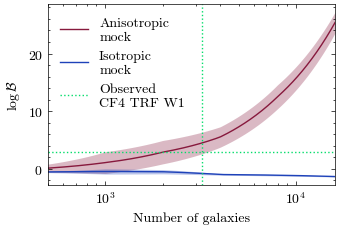

In [85]:
from scipy.interpolate import make_interp_spline

# anisotropic
fnames_a, nsamples_a = load_mock_fnames("anisotropic")
# isotropic
fnames_i, nsamples_i = load_mock_fnames("isotropic")

metric = "logZ_harmonic"
real_data_logB = 2.938

with plt.style.context(["science", "no-latex"]):
    fig, ax = plt.subplots(figsize=(3.6, 2.5))
    lw = plt.rcParams["lines.linewidth"]

    def stats(fnames, nsamples):
        gof = np.asarray([compare_zeropoint_dipole_gof(f, metric, verbose=False)
                          for f in fnames])
        ns = np.asarray(nsamples)
        xs, mu, sig = [], [], []
        for n in np.sort(np.unique(ns)):
            vals = gof[ns == n]
            if np.isfinite(vals).any():
                xs.append(n)
                mu.append(np.nanmean(vals))
                sig.append(np.nanstd(vals))
        return np.asarray(xs), np.asarray(mu), np.asarray(sig)

    def plot_band(xs, mu, sig, color, label):
        if xs.size == 0:
            return
        if xs.size >= 2:
            xnew = np.logspace(np.log10(xs.min()), np.log10(xs.max()), 300)
            # k = min(3, xs.size - 1)
            k = 1
            try:
                mu_s  = make_interp_spline(xs, mu,  k=k)(xnew)
                sig_s = make_interp_spline(xs, sig, k=k)(xnew)
                ax.plot(xnew, mu_s, lw=lw, color=color, label=label)
                ax.fill_between(xnew, mu_s - sig_s, mu_s + sig_s,
                                alpha=0.3, lw=0, color=color)
                return
            except Exception:
                pass
        # fallback
        ax.plot(xs, mu, lw=lw, color=color, label=label)
        ax.fill_between(xs, mu - sig, mu + sig, alpha=0.3, lw=0, color=color)

    # compute and plot
    xs_a, mu_a, sig_a = stats(fnames_a, nsamples_a)
    xs_i, mu_i, sig_i = stats(fnames_i, nsamples_i)

    if xs_a.size == 0 and xs_i.size == 0:
        raise RuntimeError("No finite values to plot for either set.")

    plot_band(xs_a, mu_a, sig_a, color=COLS[0], label="Anisotropic\nmock")
    plot_band(xs_i, mu_i, sig_i, color=COLS[1], label="Isotropic\nmock")

    # horizontal refs
    c_data = COLS[-2]
    ax.axhline(real_data_logB, linestyle="dotted", lw=lw, color=c_data,
               label="Observed\nCF4 TRF W1")

    # optional vertical ref at 3250 if inside either range
    xmins = [x.min() for x in (xs_a, xs_i) if x.size]
    xmaxs = [x.max() for x in (xs_a, xs_i) if x.size]
    if xmins and xmaxs and (min(xmins) < 3233 < max(xmaxs)):
        ax.axvline(3233, linestyle="dotted", lw=lw, color=c_data)

    ax.set_xlabel("Number of galaxies")
    ax.set_ylabel(r"$\log \mathcal{B}$")
    ax.set_xlim(nsamples_a.min(), nsamples_a.max())
    ax.set_xscale("log")
    ax.legend()

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/evidence_comparison.pdf", dpi=450)
    plt.show()

### Figure: likelihood difference

In [107]:
def read_log_density_per_sample(fname):
    with File(fname, 'r') as f:
        return f["log_density_per_sample"][...]




lp_iso = read_log_density_per_sample("/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_linear.hdf5")
lp_aniso = read_log_density_per_sample("/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_linear.hdf5")

config_path = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR.toml"
data = candel.pvdata.load_PV_dataframes(config_path)

mean_dlog, std_dlog = candel.get_dlog_density_stats(lp_aniso, lp_iso)
x = data["zcmb"]

2025-09-07 08:29:09 loading 1 PV dataframes: ['CF4_W1']
2025-09-07 08:29:09 loading existing LOS data from /data/phys-galsim/phys1997/CANDEL/data/CF4/los_CF4_TFR_Carrick2015.hdf5.


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/data/phys-galsim/phys1997/CANDEL/data/CF4/CF4_TFR.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

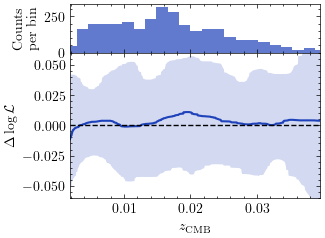

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def weighted_quantile(y, w, qs):
    y = np.asarray(y)
    w = np.asarray(w)
    m = np.isfinite(y) & np.isfinite(w) & (w > 0)
    if not np.any(m):
        return np.full(len(qs), np.nan)
    y, w = y[m], w[m]
    i = np.argsort(y)
    y, w = y[i], w[i]
    cw = np.cumsum(w)
    cw /= cw[-1]
    return np.interp(qs, cw, y)

def smooth_wq(x, y, w, x_grid, h):
    qs = (0.16, 0.50, 0.84)
    q16 = np.empty_like(x_grid)
    q50 = np.empty_like(x_grid)
    q84 = np.empty_like(x_grid)

    for k, x0 in enumerate(x_grid):
        d = (x - x0) / h
        wl = w * np.exp(-0.5 * d * d)
        # optional locality cut for speed
        wl[np.abs(d) > 3.0] = 0.0
        q = weighted_quantile(y, wl, qs)
        q16[k], q50[k], q84[k] = q
    return q16, q50, q84

# --- inputs ---
y = mean_dlog
sigma = std_dlog
xmin = float(np.nanpercentile(x, 1))
xmax = float(np.nanpercentile(x, 99.))

# inverse-variance weights
w = np.zeros_like(y, dtype=float)
m = np.isfinite(y) & np.isfinite(sigma) & (sigma > 0)
w[m] = 1.0 / (sigma[m] ** 2)

# evaluation grid and bandwidth (tune h to taste)
x_grid = np.linspace(xmin, xmax, 1000)
h = 1.25 * 300 / candel.SPEED_OF_LIGHT  # ~ Gaussian σ in redshift; adjust for smoothness

q16, q50, q84 = smooth_wq(x, y, w, x_grid, h)

with plt.style.context("science"):
    fig = plt.figure(figsize=(3.45, 3.45 * 0.75))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.0)
    ax_hist = fig.add_subplot(gs[0])
    ax = fig.add_subplot(gs[1], sharex=ax_hist)

    # top: redshift histogram
    ax_hist.hist(x, bins="auto", color=COLS[1], alpha=0.7,)
    ax_hist.set_ylabel("Counts\nper bin")
    plt.setp(ax_hist.get_xticklabels(), visible=False)

    # bottom: scatter + smooth ribbon/median
    # ax.scatter(x, y, s=1.5, alpha=0.5, color="gray", zorder=-1)
    ax.fill_between(x_grid, q16, q84, color=COLS[1], alpha=0.20, linewidth=0)
    ax.plot(x_grid, q50, "-", color=COLS[1], lw=1.5)

    ax.axhline(0.0, ls="--", color="k", lw=1)
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel(r"$z_{\rm CMB}$")
    ax.set_ylim(-0.06, 0.06)
    ax.set_ylabel(r"$\Delta \log \mathcal{L}$")


    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/CF4_W1_dlogL_vs_z.pdf", dpi=450)
    plt.show()

### H0 dipole to bulk flow

In [6]:
config_path = "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole.toml"

data = candel.pvdata.load_PV_dataframes(config_path)

2025-09-13 21:41:58 loading 1 PV dataframes: ['CF4_W1']
2025-09-13 21:41:58 loading existing LOS data from /Users/rstiskalek/Projects/CANDEL/data/CF4/los_CF4_TFR_Carrick2015.hdf5.
2025-09-13 21:41:58 initially loaded 9788 galaxies from CF4 TFR data.
2025-09-13 21:41:58 removed 6542 galaxies, thus 3246 remain.
2025-09-13 21:41:58 setting the LOS radial grid from 0.1 to 251 with 251 points.
2025-09-13 21:41:58 setting los_decay_scale to 5.0
2025-09-13 21:41:58 marginalising over 1 field realisations.


In [ ]:
root_bf = "/Users/rstiskalek/Projects/CANDEL/data/fields/field_shells"

lininterp"


r, B_C15, __ = get_bulkflow(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_linear.hdf5",
    "Carrick2015", root_bf, downsample=10, include_Vext=False)
r, B, __ = get_bulkflow(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_linear.hdf5",
    "Carrick2015", root_bf, downsample=10,)
r, B_zp, __ = get_bulkflow(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_linear.hdf5",
    "Carrick2015", root_bf, downsample=10, include_zeropoint_dipole=True)
r, B_rad, __ = get_bulkflow(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial.hdf5",
    "Carrick2015", root_bf, downsample=10, include_zeropoint_dipole=False, which_Vext="radial")

z2r = candel.Redshift2Distance()
x = data["zcmb"]
r_sample = z2r(x[x>0])

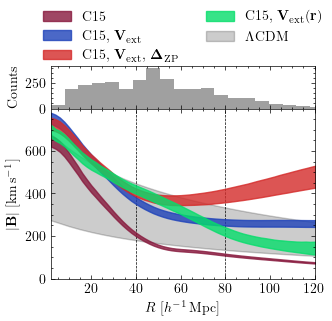

In [26]:
# --- helpers ---
def med_p16_p84(x):
    med = np.nanmedian(x, axis=1)
    p16 = np.nanpercentile(x, 16, axis=1)
    p84 = np.nanpercentile(x, 84, axis=1)
    return med, p16, p84

# --- prepare series ---
series = [
    {"B": B_C15, "label": r"C15",              "ls": "-",  "color": COLS[0]},
    {"B": B,     "label": r"C15, ${\bf V}_{\rm ext}$",              "ls": "-",  "color": COLS[1]},
    {"B": B_zp,  "label": r"C15, ${\bf V}_{\rm ext},\,\boldsymbol{\Delta}_{\rm ZP}$",  "ls": "--", "color": COLS[2]},
    {"B": B_rad, "label": r"C15, ${\bf V}_{\rm ext}(\mathbf{r})$", "ls": ":",  "color": COLS[3]},
]

# --- reference band ---
bf_ref = np.load(
    "/Users/rstiskalek/Projects/CANDEL/data/fields/field_shells/BulkFlowPlot.npy"
)
Rs, mean, std, mode, p05, p16, p84, p95 = bf_ref
m_ref = Rs < 125.0

# --- plot ---
with plt.style.context("science"):
    fig, (axh, ax) = plt.subplots(
        2, 1, sharex=True, figsize=(3.5, 0.8 * 3.5),
        gridspec_kw={"height_ratios": [1, 4], "hspace": 0.0},  # no gap
    )
    
    # histogram on top
    rs = np.asarray(r_sample)
    rs = rs[np.isfinite(rs)]
    if rs.size:
        rmin, rmax = np.nanmin(r), np.nanmax(r)
        axh.hist(rs, bins=np.linspace(rmin, rmax, 21),
                 alpha=0.75, edgecolor="none", color="0.5")
    axh.set_ylabel("Counts")
    axh.tick_params(labelbottom=False)  # hide x tick labels on top panel
    
    for s in series:
        Bmag = np.asarray(s["B"])[..., 0]
        med, lo, hi = med_p16_p84(Bmag)
        ax.fill_between(r, lo, hi, color=s["color"],
                        alpha=0.8, label=s["label"])

    ax.fill_between(Rs[m_ref], p16[m_ref], p84[m_ref],
                    color="k", alpha=0.2, zorder=0,
                    label=r"$\Lambda\mathrm{CDM}$")

    ax.set_ylabel(r"$|{\bf B}| ~ [\mathrm{km\,s^{-1}}]$")
    ax.legend(
        ncols=2,
        loc="lower center",
        bbox_to_anchor=(0.5, 1.2),
        frameon=False)
    ax.set_xlabel(r"$R ~ [h^{-1}\,\mathrm{Mpc}]$")
    ax.set_xlim(r.min(), 120)
    ax.set_ylim(0, 799)

    lw = plt.rcParams["lines.linewidth"]
    for s in [0, 40, 80, 150]:
        ax.axvline(s, color="k", ls="--", zorder=-1, lw=0.5 * lw)

    fig.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/CF4_W1_bulkflow_vs_R.pdf", dpi=450)
    plt.show()

In [16]:
r, Vrad_mag = get_Vext_radial(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial.hdf5",
    "Carrick2015", root_bf, )

Vconst_mag = read_samples(root, "precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_linear.hdf5", "Vext_mag")

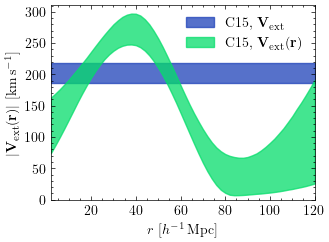

In [23]:
rmin = r.min()
rmax = 120


with plt.style.context("science"):
    plt.figure(figsize=(3.5, 0.75 * 3.5))

    plt.fill_between([rmin, rmax], np.percentile(Vconst_mag, 16), np.percentile(Vconst_mag, 84),
                     alpha=0.75, color=COLS[1], label=r"C15, ${\bf V}_{\rm ext}$")

    ylow, yhigh = np.percentile(Vrad_mag, [16, 84], axis=0)
    mask = (r >= rmin) & (r <= rmax)

    plt.fill_between(r[mask], ylow[mask], yhigh[mask], alpha=0.75, color=COLS[3],
                     label=r"C15, ${\bf V}_{\rm ext}(\mathbf{r})$")

    plt.legend()
    plt.xlim(rmin, rmax)
    plt.ylim(0)
    plt.xlabel(r"$r ~ [h^{-1}\,\mathrm{Mpc}]$")
    plt.ylabel(r"$|{\bf V}_{\rm ext}(\mathbf{r})| ~ [\mathrm{km\,s^{-1}}]$")
    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/CF4_W1_Vext_vs_R.pdf", dpi=450)

    plt.show()

In [9]:
dx = np.log10((1000 / 300)**4)

logZ_Vext_rad = candel.read_gof(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial.hdf5",
    "logZ_harmonic")
print("logZ_Vext_rad =", logZ_Vext_rad + dx)

logZ_Vext_rad_lin = candel.read_gof(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_Carrick2015_CF4_W1_MNR_linear_Vext_radial_lininterp.hdf5",
    "logZ_harmonic")
print("logZ_Vext_linear =", logZ_Vext_rad_lin + dx)

logZ_Vext = candel.read_gof(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_linear.hdf5",
    "logZ_harmonic")
print("logZ_Vext =", logZ_Vext)

logZ_zp = candel.read_gof(
    "/Users/rstiskalek/Projects/CANDEL/results/dH0/precomputed_los_precomputed_los_Carrick2015_CF4_W1_MNR_zeropoint_dipole_linear.hdf5",
    "logZ_harmonic")
print("logZ_zp =", logZ_zp)

logZ_Vext_rad = -12429.462491250786
logZ_Vext_linear = -12429.538832077684
logZ_Vext = -12433.685611765155
logZ_zp = -12430.380053960513


In [7]:
np.log10(2**4)

1.2041199826559248

In [9]:
logZ_Vext

-12433.685611765155

In [14]:
np.log10(1 / 500)

-2.6989700043360187

In [13]:
np.log10(0.3)

-0.5228787452803376